<a href="https://colab.research.google.com/github/PAastha/Sentiment-Analysis-of-Customer-Feedback-/blob/main/Ecommerce_Sentiment_Analysis_Using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


Read the csv file int dataframe

In [ ]:
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Data Dictionary**


Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.




**DATA PREPROCESSING**


In [ ]:
rename_column=[column.lower().replace(" ","_") for column in df.columns]
df.columns=rename_column

In [ ]:
df.head()

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   unnamed:_0               23486 non-null  int64 
 1   clothing_id              23486 non-null  int64 
 2   age                      23486 non-null  int64 
 3   title                    19676 non-null  object
 4   review_text              22641 non-null  object
 5   rating                   23486 non-null  int64 
 6   recommended_ind          23486 non-null  int64 
 7   positive_feedback_count  23486 non-null  int64 
 8   division_name            23472 non-null  object
 9   department_name          23472 non-null  object
 10  class_name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df=df.drop(columns="unnamed:_0")

In [ ]:
concat_reviews=[]
for title,review in zip(df["title"],df["review_text"]):
  if not pd.isnull(title) and pd.isnull(review):
    concat_review=title
  elif pd.isnull(title) and not pd.isnull(review):
    concat_review=review
  elif  not pd.isnull(title) and not pd.isnull(review):
    concat_review=title + " " + review

  concat_reviews.append(concat_review)

df = df.drop(columns=["title", "review_text"])
df["concat_reviews"] = concat_reviews

In [ ]:
#clothing_id refers to the individual piece being sold, making it suspect for machine learning:

df=df.drop(columns=["clothing_id"])

In [ ]:
df.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [ ]:
#Drop  mising values columns
print("Percentage of missing values:")
print("-----------------------------")
print(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))

df = df.dropna(axis=0)

Percentage of missing values:
-----------------------------
division_name              0.06
department_name            0.06
class_name                 0.06
age                        0.00
rating                     0.00
recommended_ind            0.00
positive_feedback_count    0.00
concat_reviews             0.00
dtype: float64


In [ ]:
df.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      23472 non-null  int64 
 1   rating                   23472 non-null  int64 
 2   recommended_ind          23472 non-null  int64 
 3   positive_feedback_count  23472 non-null  int64 
 4   division_name            23472 non-null  object
 5   department_name          23472 non-null  object
 6   class_name               23472 non-null  object
 7   concat_reviews           23472 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
#Encode the categorical columns

categorical_columns = ["division_name", "department_name", "class_name"]

for column in categorical_columns:
  print(f"unique values in:{column}:{df[column].value_counts()}")

unique values in:division_name:General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64
unique values in:department_name:Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64
unique values in:class_name:Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64


Since there are not too many categories in department_name and division_name, one hot encoding can work. We'll come back to class_name later:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews
0,33,4,1,0,2,2,5,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,4,0,1,3,Love this dress! it's sooo pretty. i happene...
2,60,3,0,0,0,1,3,Some major design flaws I had such high hopes ...
3,50,5,1,0,1,0,13,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,0,4,0,Flattering shirt This shirt is very flattering...


In [ ]:
#Standarization of numeric data
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

columns = ["age", "positive_feedback_count"]

for column in columns:
    reshaped_column = np.array(df[column]).reshape(-1, 1)
    df[column] = scaler.fit_transform(reshaped_column)

In [ ]:
df.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews
0,-0.830632,4,1,-0.444843,2,2,5,Absolutely wonderful - silky and sexy and comf...
1,-0.749204,5,1,0.256484,0,1,3,Love this dress! it's sooo pretty. i happene...
2,1.367948,3,0,-0.444843,0,1,3,Some major design flaws I had such high hopes ...
3,0.553659,5,1,-0.444843,1,0,13,"My favorite buy! I love, love, love this jumps..."
4,0.309372,5,1,0.607147,0,4,0,Flattering shirt This shirt is very flattering...


The dataframe is ready for machine learning, save concat_reviews, which needs special preprocessing for natural language processing/sentiment analysis.

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text_column(df, column_name):
    # Remove HTML tags using BeautifulSoup
    df[column_name] = df[column_name].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

    # Tokenize the cleaned text
    df[column_name] = df[column_name].apply(word_tokenize)

    # Remove punctuation and convert to lowercase
    df[column_name] = df[column_name].apply(lambda tokens: [token.lower() for token in tokens if re.match(r'\w', token)])

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df[column_name] = df[column_name].apply(lambda tokens: [token for token in tokens if token not in stop_words])

    # Initialize WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the tokens using NLTK's WordNet Lemmatizer
    df[column_name] = df[column_name].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(token) for token in tokens]))

    return df

df_preprocessed = preprocess_text_column(df, 'concat_reviews')

print(df_preprocessed)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-124-48411fee0e8b>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df[column_name] = df[column_name].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())


            age  rating  recommended_ind  positive_feedback_count  \
0     -0.830632       4                1                -0.444843   
1     -0.749204       5                1                 0.256484   
2      1.367948       3                0                -0.444843   
3      0.553659       5                1                -0.444843   
4      0.309372       5                1                 0.607147   
...         ...     ...              ...                      ...   
23481 -0.749204       5                1                -0.444843   
23482  0.390801       3                1                -0.444843   
23483 -0.993490       3                0                -0.269511   
23484 -1.237777       3                1                -0.094180   
23485  0.716517       5                1                 3.412454   

       division_name  department_name  class_name  \
0                  2                2           5   
1                  0                1           3   
2           

In [ ]:
df_preprocessed.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews
0,-0.830632,4,1,-0.444843,2,2,5,absolutely wonderful silky sexy comfortable
1,-0.749204,5,1,0.256484,0,1,3,love dress sooo pretty happened find store gla...
2,1.367948,3,0,-0.444843,0,1,3,major design flaw high hope dress really wante...
3,0.553659,5,1,-0.444843,1,0,13,favorite buy love love love jumpsuit fun flirt...
4,0.309372,5,1,0.607147,0,4,0,flattering shirt shirt flattering due adjustab...


Perform sentiment analysis on the reviews:

In [ ]:
from textblob import TextBlob
from textblob.en import subjectivity



def get_sentiment(review):
    """Returns a sentiment category and a strength of sentiment from -1 to 1."""
    sentiment_analysis = TextBlob(review)
    sentiment_polarity = sentiment_analysis.sentiment.polarity,
    sentiment_subjectivity = sentiment_analysis.sentiment.subjectivity
    return sentiment_polarity, sentiment_subjectivity

df_preprocessed["polarity"] = df_preprocessed["concat_reviews"].apply(lambda x: get_sentiment(x)[0][0])

In [ ]:
df.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews,polarity
0,-0.830632,4,1,-0.444843,2,2,5,absolutely wonderful silky sexy comfortable,0.633333
1,-0.749204,5,1,0.256484,0,1,3,love dress sooo pretty happened find store gla...,0.318750
2,1.367948,3,0,-0.444843,0,1,3,major design flaw high hope dress really wante...,0.081439
3,0.553659,5,1,-0.444843,1,0,13,favorite buy love love love jumpsuit fun flirt...,0.500000
4,0.309372,5,1,0.607147,0,4,0,flattering shirt shirt flattering due adjustab...,0.458333


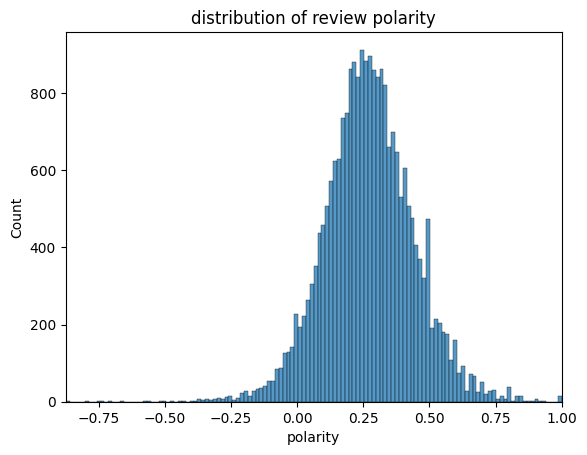

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df["polarity"])
plt.title(f"distribution of review polarity")
plt.xlim(df_preprocessed["polarity"].min(), df_preprocessed["polarity"].max())
plt.show()

Machine Learning
The data is ready for machine learning. First, seperate into feature matrix and target vector:

In [ ]:
df_preprocessed.head()

,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,concat_reviews,polarity
0,-0.830632,4,1,-0.444843,2,2,5,absolutely wonderful silky sexy comfortable,0.633333
1,-0.749204,5,1,0.256484,0,1,3,love dress sooo pretty happened find store gla...,0.318750
2,1.367948,3,0,-0.444843,0,1,3,major design flaw high hope dress really wante...,0.081439
3,0.553659,5,1,-0.444843,1,0,13,favorite buy love love love jumpsuit fun flirt...,0.500000
4,0.309372,5,1,0.607147,0,4,0,flattering shirt shirt flattering due adjustab...,0.458333


In [ ]:
X,y =df_preprocessed.drop(columns=["rating","concat_reviews"]),df["rating"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
#Fit model to training data:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Get accuracy scores for all folds of k-fold cross-validation:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


kfold = KFold(n_splits=10)
results = cross_val_score(xgb, X_train, y_train, cv=kfold)
y_test_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)

for i, result in enumerate(results):
    print(f"Fold :{i} score: {result}")
print("average score:", np.mean(results))

Fold :0 score: 0.6117891863641918
Fold :1 score: 0.6224923628022574
Fold :2 score: 0.6192153962067137
Fold :3 score: 0.6288126762226858
Fold :4 score: 0.6129957594273036
Fold :5 score: 0.6580071037956701
Fold :6 score: 0.6105225951626095
Fold :7 score: 0.6227439836885118
Fold :8 score: 0.6109800523289722
Fold :9 score: 0.6426728862386163
average score: 0.6240232002237531


This is a very low accuracy score. Let's investigate the importance of the features to find out why:


<BarContainer object of 7 artists>

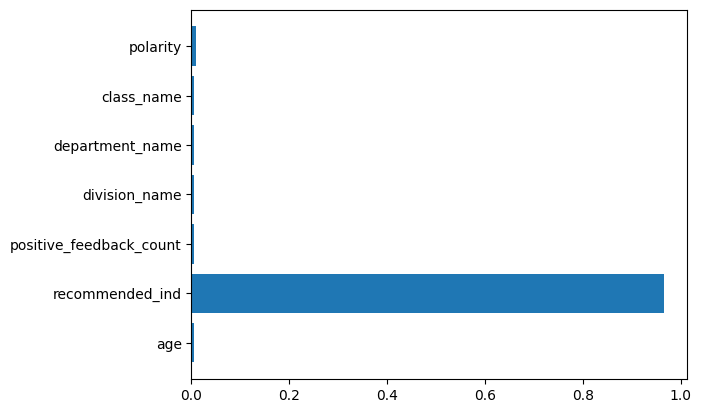

In [ ]:
plt.barh(X.columns, xgb.feature_importances_)

Clearly the recommend_ind has more predictive power in rating.

In [ ]:
X = df_preprocessed["recommended_ind"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

xgb.fit(X_train, y_train)

kfold = KFold(n_splits=10)
results = cross_val_score(xgb, X_train, y_train, cv=kfold)
y_test_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)

for i, result in enumerate(results):
    print(f"Fold :{i} score: {result}")
print("average score:", np.mean(results))

Fold :0 score: 0.6169746004551384
Fold :1 score: 0.6234362488472232
Fold :2 score: 0.6304926943350608
Fold :3 score: 0.6129696869482728
Fold :4 score: 0.6114200301944559
Fold :5 score: 0.652587011297323
Fold :6 score: 0.64085533342269
Fold :7 score: 0.6254288365735748
Fold :8 score: 0.6089450048178738
Fold :9 score: 0.6480712963342524
average score: 0.6271180743225864


No significant increase in performance. At this point, a different target feature related to a business question may be focused on, but, for now, ratings doesn't seem like a reliable feature to predict based on this data.